In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow 


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2359 sha256=332b39f99bec6936a956ae833ecac587f6859c850b28158681b9164cf0e8cd14
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score,  f1_score
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

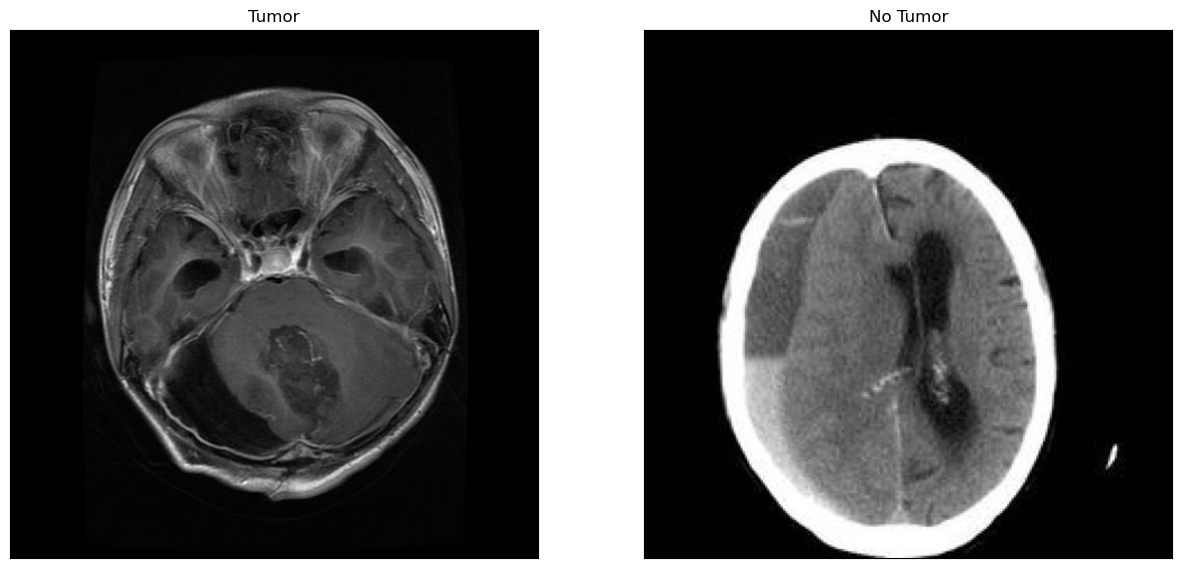

In [6]:
import cv2
import matplotlib.pyplot as plt

upic='/kaggle/input/tinu-new/dataset2/Testing/glioma/Te-glTr_0000.jpg'
apic='/kaggle/input/tinu-new/dataset2/Testing/notumor/Te-noTr_0000.jpg'
plt.figure(1, figsize=(15, 7))
plt.subplot(1, 2, 1)
uninfected_img = cv2.imread(upic)
uninfected_img = cv2.cvtColor(uninfected_img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB color space
plt.imshow(uninfected_img)
plt.title('Tumor')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
parasitized_img = cv2.imread(apic)
parasitized_img = cv2.cvtColor(parasitized_img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB color space
plt.imshow(parasitized_img)
plt.title('No Tumor')
plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
np.random.seed(42)
tf.random.set_seed(42)


In [8]:
input_shape = (224, 224, 3)
batch_size = 32
epochs = 10  # Increase the number of epochs


In [9]:
train_path = '/kaggle/input/tinu-new/dataset2/Training'
val_path = '/kaggle/input/tinu-new/dataset2/Testing'



In [10]:

# Data augmentation with additional transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,  # Additional rotation
    width_shift_range=0.1,  # Additional width shift
    height_shift_range=0.1,  # Additional height shift
    brightness_range=[0.8, 1.2],  # Additional brightness adjustment
)

In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 5712 images belonging to 4 classes.


In [13]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 1311 images belonging to 4 classes.


In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

# VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
# Fine-tune some of the later layers
for layer in vgg16.layers[:15]:
    layer.trainable = False

In [16]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(train_generator.num_classes, activation='softmax')(x)


In [17]:
model = Model(inputs=vgg16.input, outputs=x)

In [18]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# Use a smaller learning rate
optimizer = Adam(learning_rate=0.0001)

In [20]:
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model on the training data
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/10
179/179 [==============================] - 147s 760ms/step - loss: 0.5577 - accuracy: 0.7906 - val_loss: 0.2995 - val_accuracy: 0.8978
Epoch 2/10
179/179 [==============================] - 84s 470ms/step - loss: 0.2849 - accuracy: 0.9004 - val_loss: 0.2264 - val_accuracy: 0.9138
Epoch 3/10
179/179 [==============================] - 86s 479ms/step - loss: 0.2115 - accuracy: 0.9217 - val_loss: 0.2195 - val_accuracy: 0.9191
Epoch 4/10
179/179 [==============================] - 85s 473ms/step - loss: 0.1582 - accuracy: 0.9415 - val_loss: 0.1318 - val_accuracy: 0.9443
Epoch 5/10
179/179 [==============================] - 84s 468ms/step - loss: 0.1087 - accuracy: 0.9624 - val_loss: 0.1523 - val_accuracy: 0.9481
Epoch 7/10
179/179 [==============================] - 83s 465ms/step - loss: 0.1070 - accuracy: 0.9653 - val_loss: 0.1102 - val_accuracy: 0.9603
Epoch 8/10
179/179 [==============================] - 84s 471ms/step - loss: 0.0858 - accuracy: 0.9718 - val_loss: 0.0950 - val_a

In [22]:
model.save('path_to_save_model.h5')

In [23]:
# Evaluate the model on the test set
test_predictions = model.predict(val_generator)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels


41/41 [==============================] - 4s 91ms/step


In [24]:
val_labels = val_generator.classes
accuracy = accuracy_score(val_labels, test_predictions)
print('Accuracy:', accuracy )


Accuracy: 0.973302822273074


In [25]:
# Plot the learning curve
def plotLearningCurve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

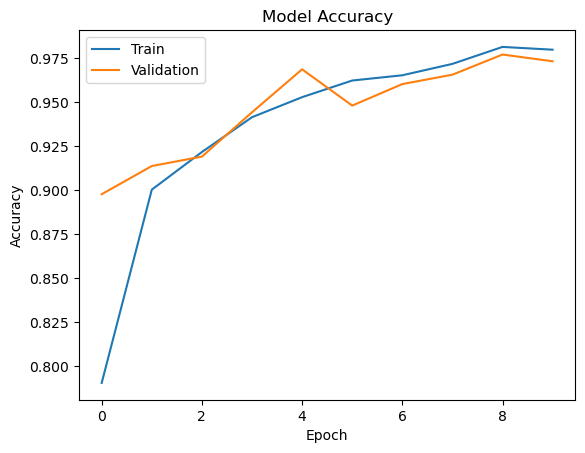

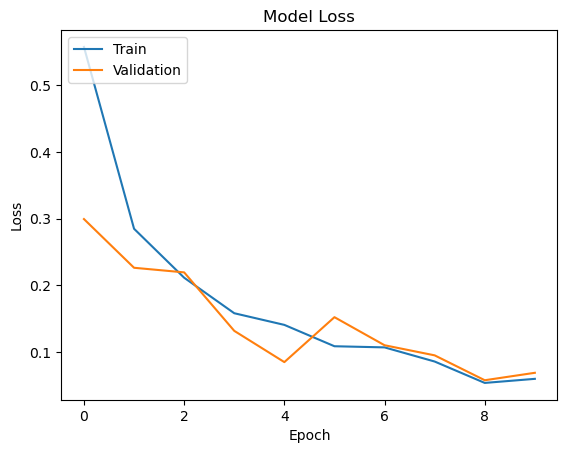

In [26]:
plotLearningCurve(history)

In [27]:
from sklearn.metrics import confusion_matrix

# Assuming you have defined 'test_predictions' and 'val_labels' previously

# Compute the confusion matrix
cm = confusion_matrix(val_labels, test_predictions)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[296   3   0   1]
 [ 13 277   1  15]
 [  1   0 404   0]
 [  1   0   0 299]]


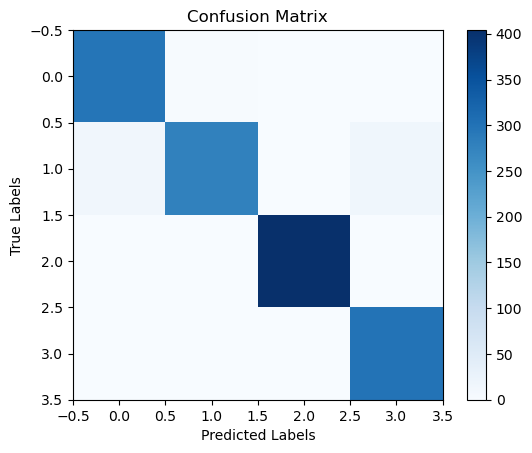

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined 'test_predictions' and 'val_labels' previously

# Compute the confusion matrix
cm = confusion_matrix(val_labels, test_predictions)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have defined 'test_predictions' and 'val_labels' previously

# Generate the classification report
report = classification_report(val_labels, test_predictions)

# Print the classification report
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       300
           1       0.99      0.91      0.95       306
           2       1.00      1.00      1.00       405
           3       0.95      1.00      0.97       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



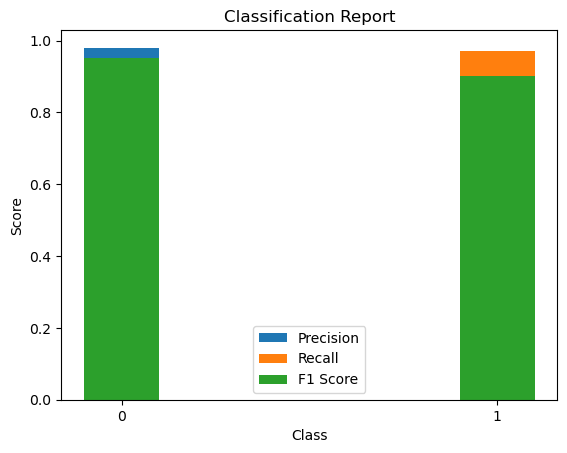

In [30]:
# Plot the classification report as a bar graph
labels = ['0', '1']  # Replace with your class labels
precision = [0.98, 0.84]  # Replace with precision values
recall = [0.91, 0.97]  # Replace with recall values
f1_score = [0.95, 0.90]  # Replace with F1 scores

x = range(len(labels))

plt.bar(x, precision, width=0.2, label='Precision')
plt.bar(x, recall, width=0.2, label='Recall')
plt.bar(x, f1_score, width=0.2, label='F1 Score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks(x, labels)
plt.legend()
plt.show()

In [31]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Conv2D, UpSampling2D

# VGG16-based FCN architecture
def fcn_vgg16():
    # Load the VGG16 model without the fully connected layers
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(None, None, 3))
    
    # Freeze the layers of VGG16
    for layer in vgg_model.layers:
        layer.trainable = False
    
    # Add convolutional layers for upsampling
    x = Conv2D(4096, (7, 7), activation='relu', padding='same')(vgg_model.output)
    x = Conv2D(4096, (1, 1), activation='relu', padding='same')(x)
    x = Conv2D(21, (1, 1), activation='softmax', padding='same')(x)
    
    # Upsample the output
    x = UpSampling2D(size=(32, 32))(x)
    
    # Create the FCN model
    fcn_model = Model(inputs=vgg_model.input, outputs=x)
    
    return fcn_model

# Load the FCN model
model = fcn_vgg16()

# Perform image segmentation
def segment_image(image):
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32')
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    
    # Perform segmentation
    mask = model.predict(image)
    
    # Process the mask
    mask = np.argmax(mask, axis=3)[0]
    
    return mask

In [32]:
# Save the FCN model
model.save('fcn_model.h5')

1/1 [==============================] - 1s 545ms/step


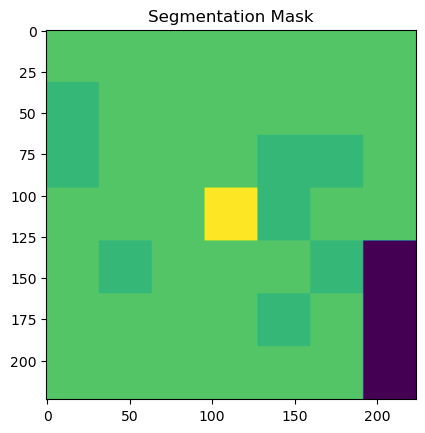

1/1 [==============================] - 0s 20ms/step


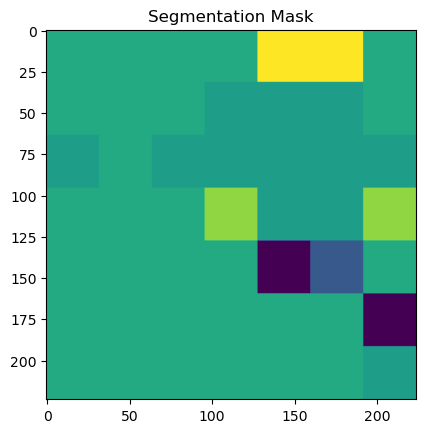

1/1 [==============================] - 0s 29ms/step


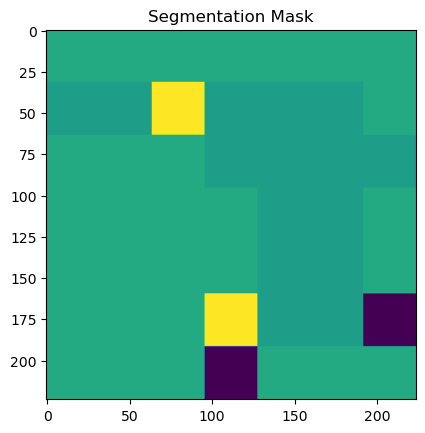

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Conv2D, UpSampling2D

# VGG16-based FCN architecture
def fcn_vgg16():
    # Load the VGG16 model without the fully connected layers
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(None, None, 3))
    
    # Freeze the layers of VGG16
    for layer in vgg_model.layers:
        layer.trainable = False
    
    # Add convolutional layers for upsampling
    x = Conv2D(4096, (7, 7), activation='relu', padding='same')(vgg_model.output)
    x = Conv2D(4096, (1, 1), activation='relu', padding='same')(x)
    x = Conv2D(21, (1, 1), activation='softmax', padding='same')(x)
    
    # Upsample the output
    x = UpSampling2D(size=(32, 32))(x)
    
    # Create the FCN model
    fcn_model = Model(inputs=vgg_model.input, outputs=x)
    
    return fcn_model

# Load the FCN model
model = fcn_vgg16()

# Perform image segmentation
def segment_image(image):
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32')
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    
    # Perform segmentation
    mask = model.predict(image)
    
    # Process the mask
    mask = np.argmax(mask, axis=3)[0]
    
    return mask

# Example usage
image_paths = ['/kaggle/input/tinu-new/dataset2/Testing/glioma/Te-glTr_0001.jpg', '/kaggle/input/tinu-new/dataset2/Testing/meningioma/Te-meTr_0001.jpg', '/kaggle/input/tinu-new/dataset2/Testing/notumor/Te-noTr_0001.jpg']

# Perform segmentation on sample images
for image_path in image_paths:
    image = cv2.imread(image_path)
    mask = segment_image(image)
    
     # Display the segmentation mask
    plt.imshow(mask)
    plt.title('Segmentation Mask')
    plt.show()


Segmentation Properties - Size: 262144, Location: (array([ 55,  55,  55, ..., 463, 463, 463]), array([274, 275, 276, ..., 251, 252, 253])), Shape: (512, 512)


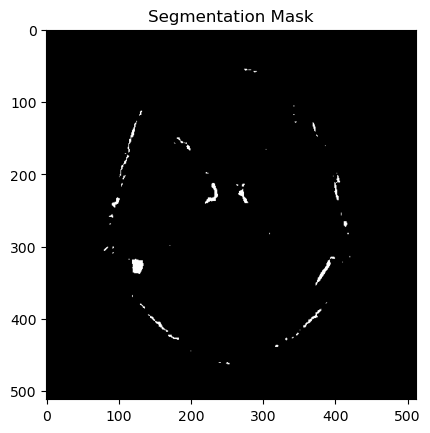

Segmentation Properties - Size: 78899, Location: (array([  2,   2,   2, ..., 306, 306, 306]), array([154, 155, 156, ..., 143, 144, 145])), Shape: (307, 257)


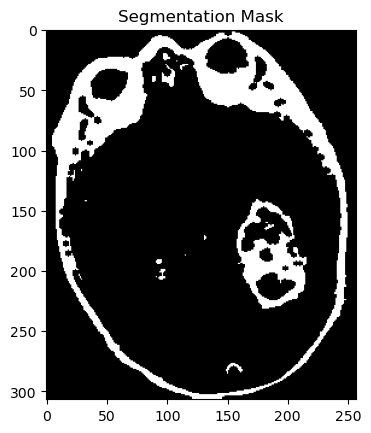

Segmentation Properties - Size: 61360, Location: (array([ 42,  42,  42, ..., 241, 241, 241]), array([106, 107, 108, ..., 131, 132, 133])), Shape: (260, 236)


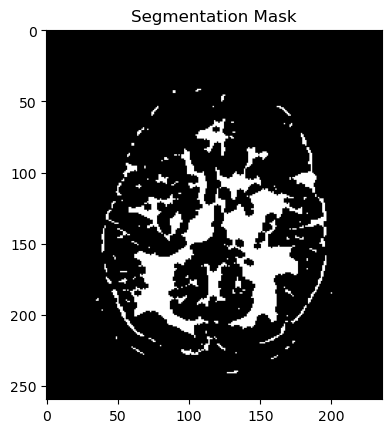

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to segment the image
def segment_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to obtain binary mask
    _, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Apply morphological operations for better segmentation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    return closed_mask

# Function to check size, location, and shape of segmented image
def check_segmentation_properties(mask):
    # Compute the size of the segmented image
    size = mask.size

    # Compute the location of the segmented image
    location = np.nonzero(mask)

    # Compute the shape of the segmented image
    shape = mask.shape

    return size, location, shape

# Example usage
image_paths = ['/kaggle/input/tinu-new/dataset2/Testing/glioma/Te-glTr_0001.jpg',
               '/kaggle/input/tinu-new/dataset2/Testing/meningioma/Te-meTr_0001.jpg',
               '/kaggle/input/tinu-new/dataset2/Testing/notumor/Te-noTr_0001.jpg']

# Perform segmentation and check properties on sample images
for image_path in image_paths:
    image = cv2.imread(image_path)
    mask = segment_image(image)

    # Check segmentation properties
    size, location, shape = check_segmentation_properties(mask)

    # Print the properties
    print(f"Segmentation Properties - Size: {size}, Location: {location}, Shape: {shape}")

    # Display the segmentation mask
    plt.imshow(mask, cmap='gray')
    plt.title('Segmentation Mask')
    plt.show()


1/1 [==============================] - 0s 143ms/step
Image: Te-pi_0241.jpg, True Class: pituitary, Predicted Class: pituitary


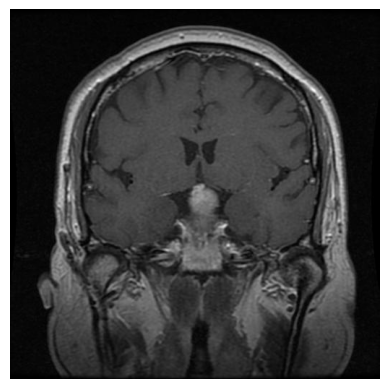

1/1 [==============================] - 0s 19ms/step
Image: Te-gl_0188.jpg, True Class: glioma, Predicted Class: glioma


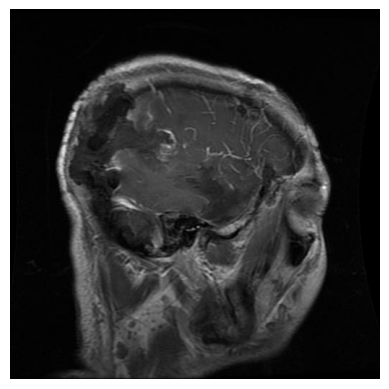

1/1 [==============================] - 0s 30ms/step
Image: Te-gl_0106.jpg, True Class: glioma, Predicted Class: glioma


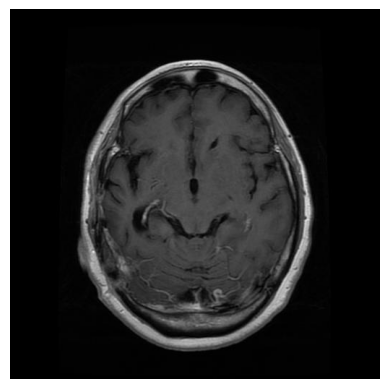

1/1 [==============================] - 0s 19ms/step
Image: Te-me_0224.jpg, True Class: meningioma, Predicted Class: meningioma


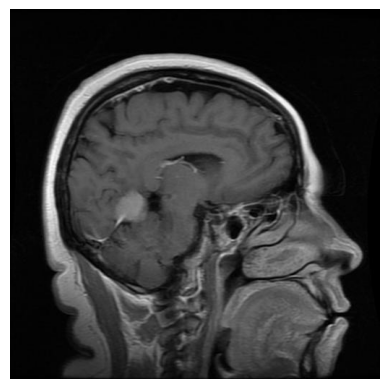

1/1 [==============================] - 0s 18ms/step
Image: Te-me_0070.jpg, True Class: meningioma, Predicted Class: meningioma


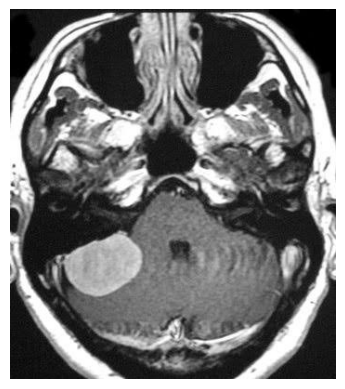

1/1 [==============================] - 0s 19ms/step
Image: Te-me_0203.jpg, True Class: meningioma, Predicted Class: meningioma


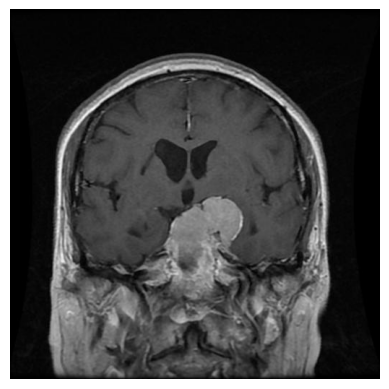

1/1 [==============================] - 0s 18ms/step
Image: Te-no_0102.jpg, True Class: notumor, Predicted Class: notumor


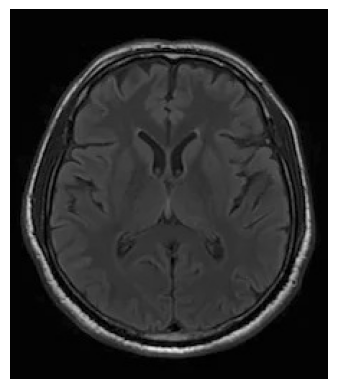

1/1 [==============================] - 0s 22ms/step
Image: Te-me_0157.jpg, True Class: meningioma, Predicted Class: meningioma


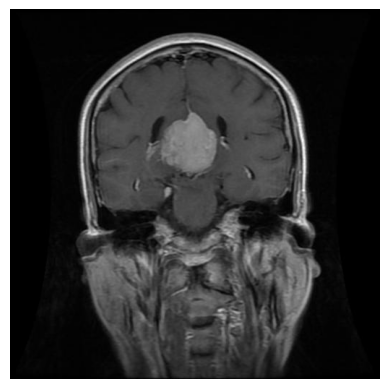

1/1 [==============================] - 0s 20ms/step
Image: Te-pi_0083.jpg, True Class: pituitary, Predicted Class: pituitary


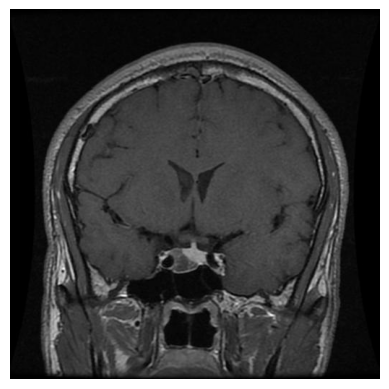

1/1 [==============================] - 0s 20ms/step
Image: Te-gl_0247.jpg, True Class: glioma, Predicted Class: meningioma


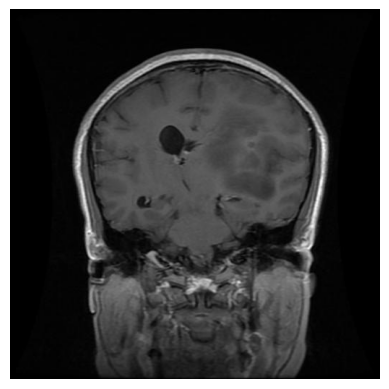

1/1 [==============================] - 0s 19ms/step
Image: Te-pi_0180.jpg, True Class: pituitary, Predicted Class: pituitary


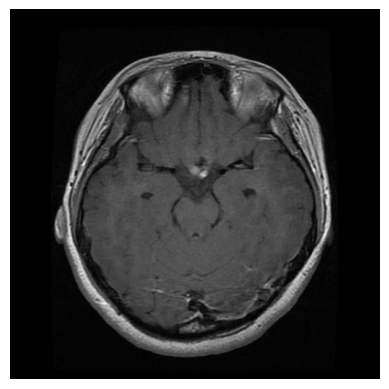

1/1 [==============================] - 0s 19ms/step
Image: Te-gl_0290.jpg, True Class: glioma, Predicted Class: glioma


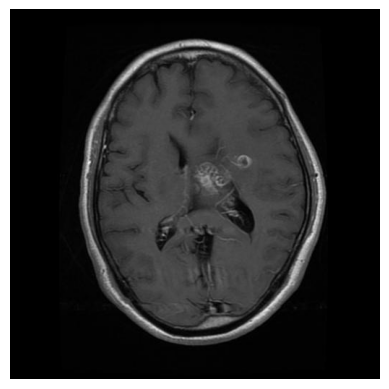

1/1 [==============================] - 0s 19ms/step
Image: Te-no_0116.jpg, True Class: notumor, Predicted Class: notumor


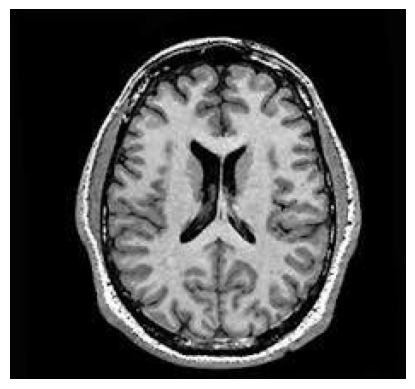

1/1 [==============================] - 0s 19ms/step
Image: Te-me_0043.jpg, True Class: meningioma, Predicted Class: meningioma


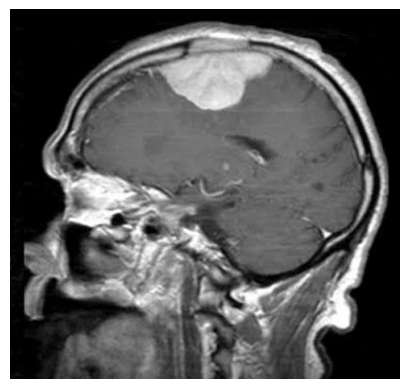

1/1 [==============================] - 0s 19ms/step
Image: Te-no_0057.jpg, True Class: notumor, Predicted Class: notumor


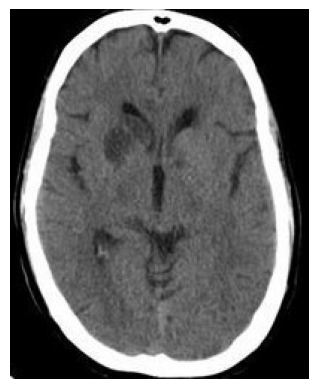

Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.75      0.86         4
  meningioma       0.83      1.00      0.91         5
     notumor       1.00      1.00      1.00         3
   pituitary       1.00      1.00      1.00         3
     unknown       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93        15
   macro avg       0.77      0.75      0.75        15
weighted avg       0.94      0.93      0.93        15



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [39]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report
import random

# Load the trained model
model = tf.keras.models.load_model('path_to_save_model.h5')

# Preprocess the input image
def preprocess_image(image):
    resized_image = cv2.resize(image, (224, 224))
    resized_image = resized_image.astype(np.float32)
    normalized_image = resized_image / 255.0
    return normalized_image

# Classify a single image
def classify_image(image):
    preprocessed_image = preprocess_image(image)
    predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = np.argmax(predictions)
    return predicted_label

# Define the tumor type labels
tumor_labels = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary',
    4: 'unknown'
}

# Placeholder values for image directory
image_dir = '/kaggle/input/tinu-new/dataset2/Testing/'

# Get a list of all image file paths in the testing folder
image_paths = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        image_path = os.path.join(root, file)
        image_paths.append(image_path)

# Randomly select 5 image paths
random.shuffle(image_paths)
image_paths = image_paths[:15]

# Iterate over the selected images and classify them
true_labels = []
predicted_labels = []
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)
    # Classify the image
    predicted_label = classify_image(image)
    # Extract the label from the image directory
    label = os.path.basename(os.path.dirname(image_path))
    # Convert the true label to numerical value
    true_label = list(tumor_labels.keys())[list(tumor_labels.values()).index(label)]
    # Append true and predicted labels for calculating metrics
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)
    # Display the results
    predicted_tumor = tumor_labels.get(predicted_label, 'unknown')
    print(f"Image: {os.path.basename(image_path)}, True Class: {label}, Predicted Class: {predicted_tumor}")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Calculate classification metrics
report = classification_report(true_labels, predicted_labels, labels=list(tumor_labels.keys()), target_names=list(tumor_labels.values()))

# Print the classification report
print("Classification Report:")
print(report)


In [42]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333
